# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Общая информация

In [1]:
import pandas as pd 
#data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
#data.to_csv('real_estate_data.csv', index=False) 

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
    
data.to_csv('real_estate_data.csv', index=False)

display(data.head(15))
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице 22 столбца с разными типами данных: `int64`, `float`, `object`, `bool`. Названия столбцов соответствуют хорошему стилю.

Согласно документации к данным:
* `total_images` — число фотографий квартиры в объявлении;           
* `last_price` — цена на момент снятия с публикации;  
* `total_area` — общая площадь квартиры в квадратных метрах (м²);
* `first_day_exposition` — дата публикации;
* `rooms` — число комнат;
* `ceiling_height` — высота потолков (м);
* `floors_total` — всего этажей в доме;
* `living_area` — жилая площадь в квадратных метрах (м²);
* `floor` — этаж;
* `is_apartment` — апартаменты (булев тип);
* `studio` — квартира-студия (булев тип);
* `open_plan` — свободная планировка (булев тип);
* `kitchen_area` — площадь кухни в квадратных метрах (м²);
* `balcony` — число балконов;
* `locality_name` — название населённого пункта;
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м);
* `cityCenters_nearest` — расстояние до центра города (м);
* `parks_around3000` — число парков в радиусе 3 км;
* `parks_nearest` — расстояние до ближайшего парка (м);
* `ponds_around3000` — число водоёмов в радиусе 3 км;
* `ponds_nearest` — расстояние до ближайшего водоёма (м);
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия).

Количество значений в столбцах различается. Значит в данных есть пропущенные значения.

In [14]:
 data.isna().sum() # оценим количество пропусков с помощью комбинации методов

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [15]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

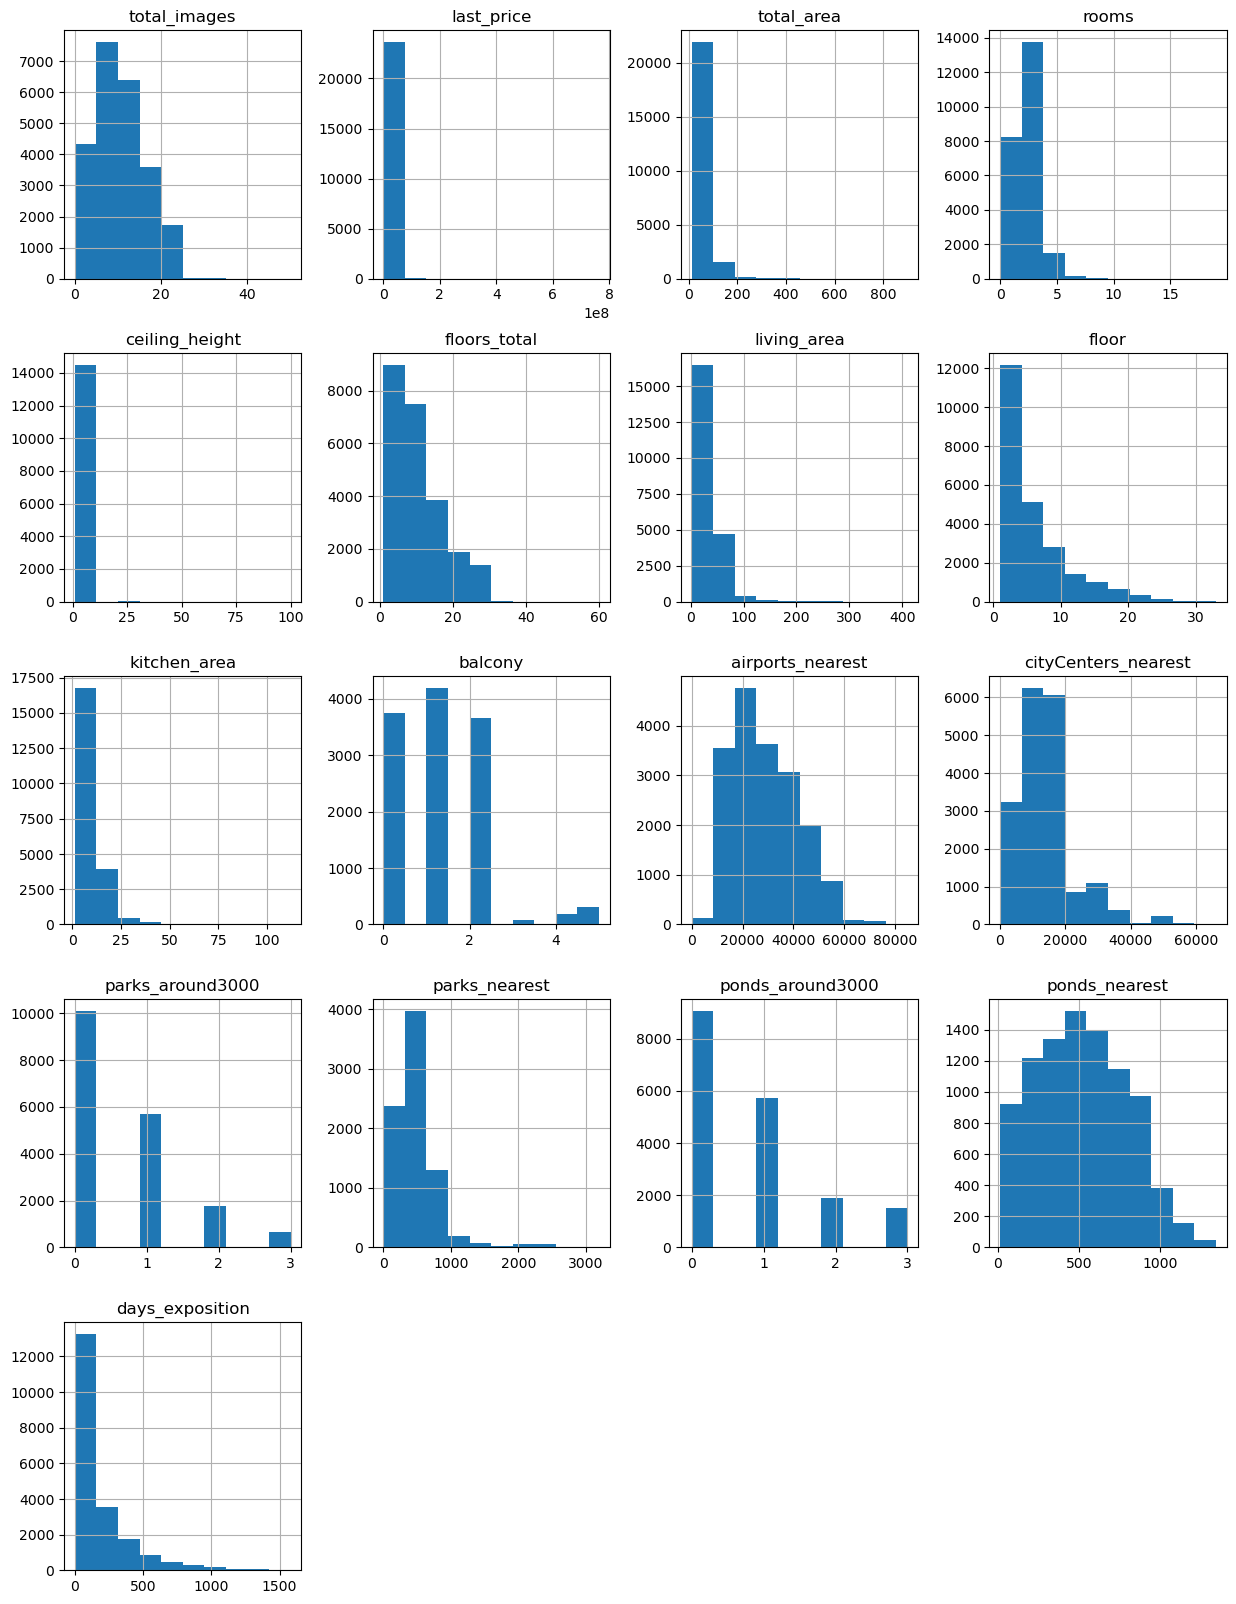

In [16]:
data.hist(figsize=(15, 20))

По гистаграммам и информации, полученной с помощью метода describe(), видно, что встречаются выбросы в данных. 
Например, это хорошо прослеживается в `ceiling_height`. Очевидно, что не бывает комнат с потолками 1 м или 100 м. 
Нужно будет удалить/скорректировать ряд значений. А вот ноль комнат трогать не будем, так как это вполне может быть при продажи квартиры без планировки. 

Что касается максимальных редких значений в `total_area`, `living_area`, `kitchen_area`, то изначально было решено их не трогать. Так как это могут быть не ошибки в данных, а реальные значения, и такие элитные квартиры существуют. Но в дальнейшем при анализе выснилось, что они портят качество визуализации. Поэтому избавимся от них.

**Выводы**

В каждой строке таблицы — данные о квартире, выставленной на продажу. Предварительно можно утверждать, что данных достаточно для изучения особенностей и зависимостей, которые существуют на рынке недвижимости. Но при первой оценке видно, что встречаются пропуски в данных, аномальные значения, не соответствующий тип данных. 

Поэтому важно будет устранить проблемы в данных.

### Предобработка данных

#### Пропуски, редкие значения и аномалии

В таблице очень много пропусков. Не будем трогать пропуски в столбцах `airports_nearest`, `cityCenters_nearest`, `parks_nearest`, `ponds_nearest`, `days_exposition`. Вероятно, в большинстве случаев расстояние до указанных объектов слишком велико, поэтому информацию даже не указывали. Или же считали эту информацию несущественной. Пропуски в столбце `days_exposition` могут говорить о том, что объявление не было снято с публикации на момент формирования архива. Остальные пропуски обработаем различными способами:

In [17]:
# Удалим строки, где не указаны населенный пункт и количество этажей в связи с несущественным количеством пропусков
data = data.dropna(subset=['locality_name', 'floors_total'])

# Заменим пропуски в нескольких столбцах на ноль, где возможно, что незаполненные ячейки подразумевают
# отсутствие балконов, а также парков и водоемов в радиусе 3 км. Но также вероятно, что пропуски не заполнены по техническим
# причинам, или данные не собираются для каких-то районов.
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

# Заменим пустые значения площади кухни и жилой площади
# Предварительно рассчитаем, какую долю в среднем занимает кухня и жилая зона в общей площади квартиры
kitchen_share = data['kitchen_area'].mean() / data['total_area'].mean()
living_share = data['living_area'].mean() / data['total_area'].mean()

data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_share * data['total_area'])
data['living_area'] = data['living_area'].fillna(living_share * data['total_area'])

In [18]:
# Отдельно разберемся с потолками. Минимальной нормой в России считается высота потолка 2,4 м. 
# Поэтому будем считать, что в значениях 24 м и более пропущена запятая. Исправим это: 
data.loc[(data['ceiling_height'] >= 24), 'ceiling_height'] = \
data.loc[(data['ceiling_height'] >= 24), 'ceiling_height']/10

In [19]:
# Пропуски в столбце с высотой потолка заменим на медианное значение по каждому типу этажности дома. 
# Т.е. предполагаем, что потолки для домов с одинаковой этажностью примерно одинаковы.

for floors_total in data['floors_total'].unique():
    data.loc[(data['floors_total'] == floors_total) & data['ceiling_height'].isna(), 'ceiling_height'] \
    = data.loc[(data['floors_total'] == floors_total), 'ceiling_height'].median()
    
# Строку с одним оставшимся пропуском можно удалить
data = data.dropna(subset=['ceiling_height'])

In [20]:
# Оценим долю потолков с аномальными значениями (до 2.2 м и от 5 м до 24 м):
print(len(data.query('ceiling_height > 5 and ceiling_height < 24 or ceiling_height < 2.2')) / len(data))
# Оценим долю комнат с редкими значениями (от 8 комнат):
print(len(data.query('rooms > 8')) / len(data))

0.001273128501103378
0.0008063147173654727


In [21]:
# Доля потолков высотой до 2.2 м и от 5 м до 24 м крайне мала. Поэтому удалим эти строки.
data = data.loc[data['ceiling_height'] < 5]
data = data.loc[data['ceiling_height'] > 2.2]

# Доля большого количества комнат (от 9) крайне мала. Поэтому удалим эти строки.
data = data.loc[data['rooms'] < 9]

In [22]:
# Можно предположить, что аппартаментов в таблице гораздо меньше квартир.
# Если это подтвердится, заменим пропущенные значения в столбце "is apartment" на нет.

data['is_apartment'].value_counts()

False    2705
True       49
Name: is_apartment, dtype: int64

In [23]:
# Удалим редкие максимальные значения для площадей, чтобы при дальнейшем анализе улучшить визуализацию. 
data = data.loc[data['total_area'] < 400]
data = data.loc[data['living_area'] < 200]
data = data.loc[data['kitchen_area'] < 50]

In [24]:
# Заменяем пропущенные значения на False и проверяем, все ли запланированные столбцы были обработаны.
data['is_apartment'] = data['is_apartment'].fillna(False)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5505
cityCenters_nearest      5484
parks_around3000            0
parks_nearest           15481
ponds_around3000            0
ponds_nearest           14465
days_exposition          3141
dtype: int64

#### Типы данных

Чтобы работать с данными, необходимо привести их к соответствующему типу. Например, дату следует привести к типу datetime64, чтобы можно было применить к ней метод dt.weekday и др. Некоторые столбцы могут иметь только целочисленные значения (например, этажность в доме не может быть вещественным числом).

In [25]:
# Изменим типы данных в некоторых столбцах согласно логике 
data['floors_total'] = data['floors_total'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
data['last_price'] = data['last_price'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['is_apartment'] = data['is_apartment'].astype(bool)

# Приводим к типу даты дату публикации
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23423 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23423 non-null  int64         
 1   last_price            23423 non-null  int32         
 2   total_area            23423 non-null  float64       
 3   first_day_exposition  23423 non-null  datetime64[ns]
 4   rooms                 23423 non-null  int64         
 5   ceiling_height        23423 non-null  float64       
 6   floors_total          23423 non-null  int32         
 7   living_area           23423 non-null  float64       
 8   floor                 23423 non-null  int64         
 9   is_apartment          23423 non-null  bool          
 10  studio                23423 non-null  bool          
 11  open_plan             23423 non-null  bool          
 12  kitchen_area          23423 non-null  float64       
 13  balcony         

#### Явные и неявные дубликаты

In [26]:
data.duplicated().sum() # Оценим количество явных дубликатов

0

Явных дубликатов в таблице не оказалось. Теперь изучим столбец с названиями населенных пунктов и устраним неявные дубликаты.

In [27]:
# Проверим количество уникальных названий населенных пунктов и выведем отсортированный список
print(data['locality_name'].nunique())
data['locality_name'].sort_values().unique()

364


array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [28]:
# Избавимся от неявных дубликатов в наименованиях, удалив типы населенных пунктов
duplicates_poselok = (['деревня', 'посёлок', 'поселок', 'коттеджный', 'городской', 'городского типа', 'садовое товарищество',
                       'село', 'при железнодорожной', 'станции', 'садоводческое некоммерческое товарищество'])
for duplicate in duplicates_poselok:
    data['locality_name'] = data['locality_name'].str.replace(duplicate, '')
# Убедимся, что количество уникальных названий сократилось
data['locality_name'].nunique()

318

**Выводы**

Предобработка обнаружила ряд проблем в данных, которые были устранены:

- пропущенные значения,
- аномалии в данных,
- редкие значения,
- не соответствующие типы данных,
- неявные дубликаты.



### Посчитайте и добавьте в таблицу новые столбцы

In [29]:
# Добавляем столбец с ценой одного квадратного метра
data['square_meter_price'] = data['last_price'] / data['total_area']

# Добавляем столбцы с номером дня в неделе, месяцем, годом
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

# Добавляем тип этажа квартиры (значения — «первый», «последний», «другой»)
# Предварительно создаем функцию, чтобы применить ее к новому столбцу
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)

# расстояние до центра города, переведенное из метров в километры и округленное до целых значений
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000, 0)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23423 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23423 non-null  int64         
 1   last_price              23423 non-null  int32         
 2   total_area              23423 non-null  float64       
 3   first_day_exposition    23423 non-null  datetime64[ns]
 4   rooms                   23423 non-null  int64         
 5   ceiling_height          23423 non-null  float64       
 6   floors_total            23423 non-null  int32         
 7   living_area             23423 non-null  float64       
 8   floor                   23423 non-null  int64         
 9   is_apartment            23423 non-null  bool          
 10  studio                  23423 non-null  bool          
 11  open_plan               23423 non-null  bool          
 12  kitchen_area            23423 non-null  float6

**Выводы**

Добавлены следующие столбцы согласно инструкциям:

* `square_meter_price` — цена одного квадратного метра;
* `weekday` — день недели публикации объявления;
* `month` — месяц публикации объявления;
* `year` — год публикации объявления;
* `floor_type` — тип этажа квартиры;
* `cityCenters_nearest_km` — расстояние до центра города в километрах.

### Проведите исследовательский анализ данных

#### Параметры объектов

array([[<Axes: title={'center': 'floor'}>]], dtype=object)

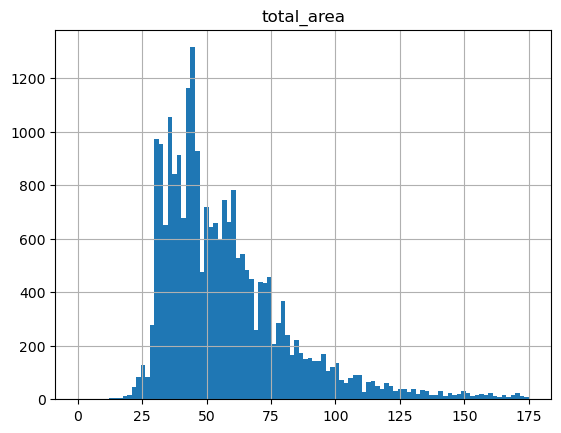

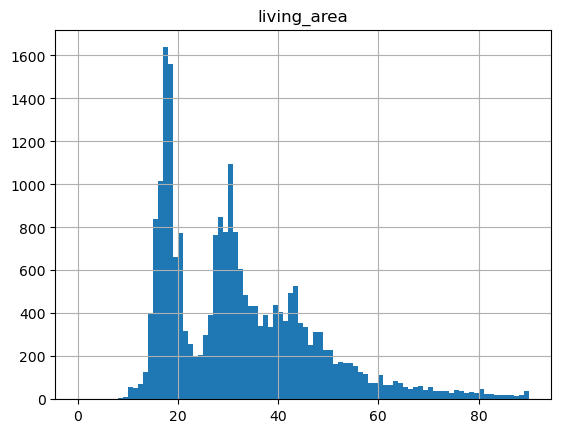

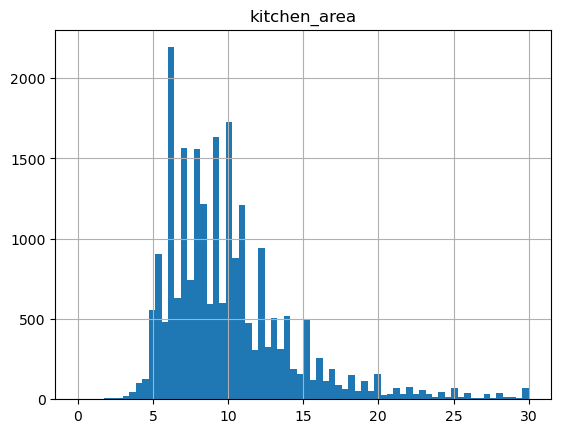

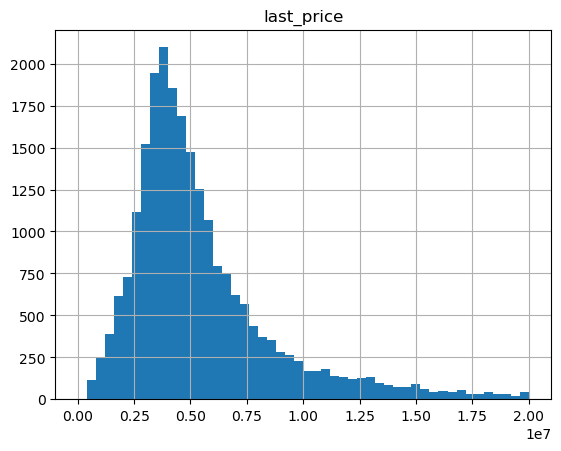

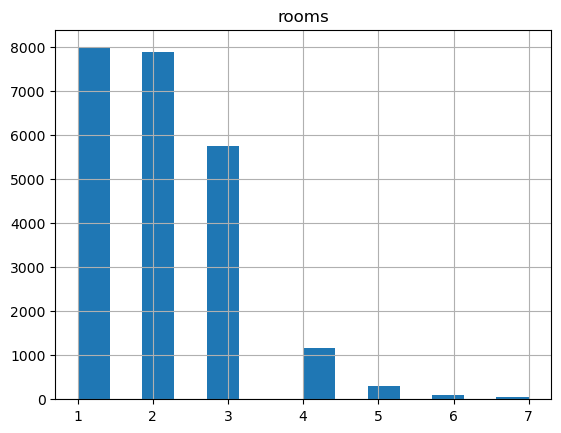

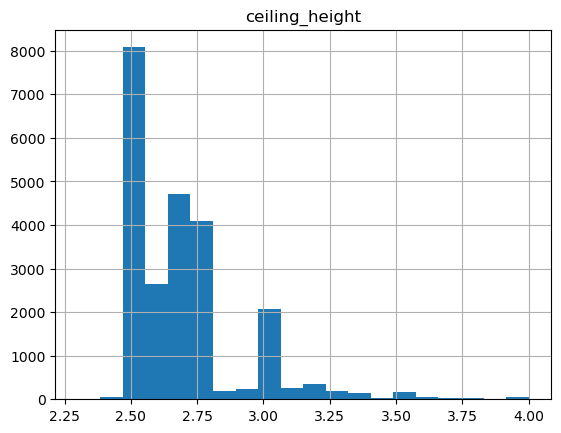

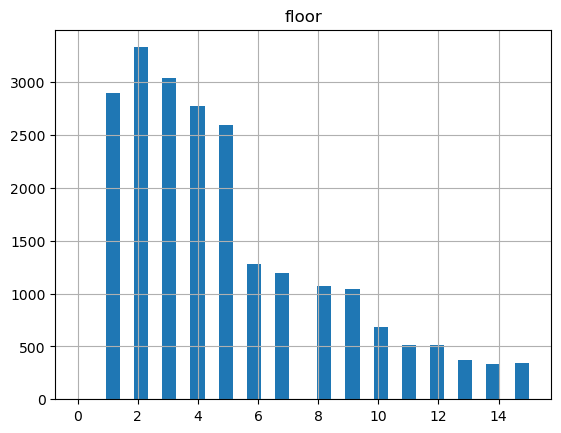

In [30]:
data.hist('total_area', bins = 100, range = (0, 175))
data.hist('living_area', bins = 90, range = (0, 90))
data.hist('kitchen_area', bins = 70, range = (0, 30))
data.hist('last_price', bins = 50, range = (0, 20000000))
data.hist('rooms', bins = 14, range = (1, 7))
data.hist('ceiling_height', bins = 20, range = (2.3, 4))
data.hist('floor', bins = 32, range = (0, 15))

count    23423.000000
mean        59.207204
std         30.217007
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        373.100000
Name: total_area, dtype: float64

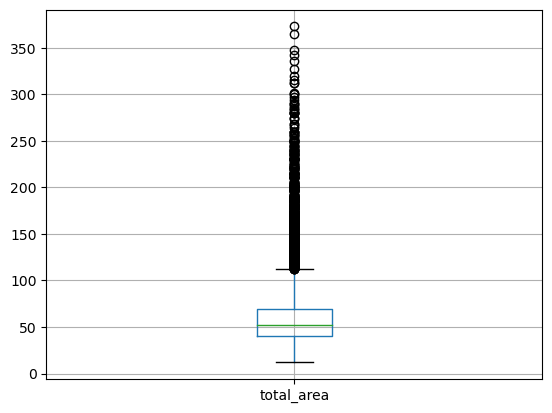

In [31]:
# Интересно подробнее рассмотреть редкие и аномальные величины для некоторых параметров
data.boxplot('total_area')
data['total_area'].describe()

count    23423.000000
mean        33.971361
std         19.457798
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        195.000000
Name: living_area, dtype: float64

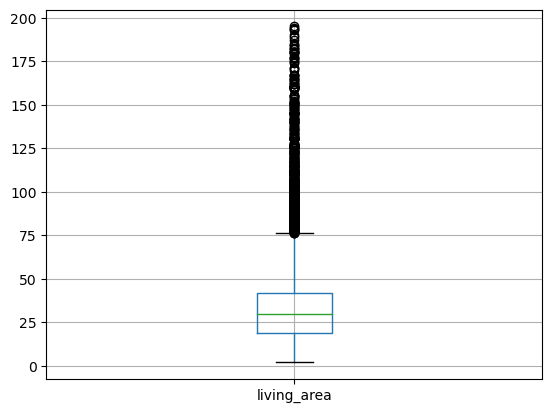

In [32]:
data.boxplot('living_area')
data['living_area'].describe()

count    23423.000000
mean        10.310117
std          5.161271
min          1.300000
25%          7.000000
50%          9.000000
75%         11.905073
max         49.400000
Name: kitchen_area, dtype: float64

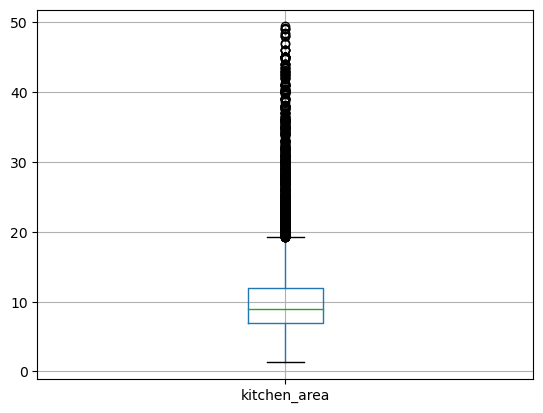

In [33]:
data.boxplot('kitchen_area')
data['kitchen_area'].describe()

count    2.342300e+04
mean     6.217954e+06
std      7.392743e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      3.300000e+08
Name: last_price, dtype: float64

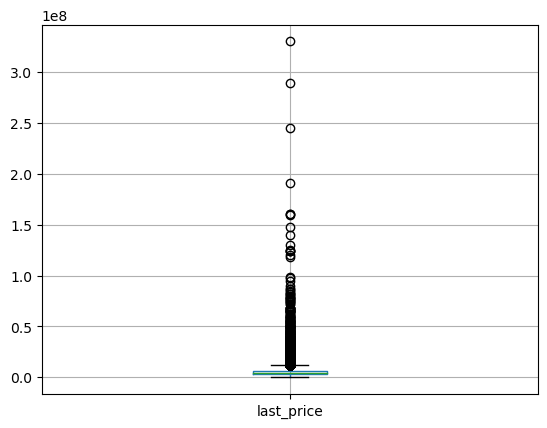

In [34]:
data.boxplot('last_price')
data['last_price'].describe()

* `total_area`:
Большинство квартир имеют площадь до 90 квадратных метров. Далее, с увеличением площади количество квартир стремится к нулю. Всплески на 30, 45, 65 кв. м - это, вероятно, типовая площадь однокомнатных, двухкомнатных и трехкомнатных квартир соответственно. Медианное значение общей площади составляет 52 кв.м. Площади свыше 112 кв.м относятся к очень большим. Встречаются и единичные огромные квартиры (например, 373 кв.м.)

* `living_area`:
Жилая площадь - это площадь комнат. Здесь пиковые значения более выражены по сравнению с общей площадью и явно соответствуют квартирам с 1,2 и 3 комнатами. Медианное значение жилой площади составляет 9 кв.м. Площади свыше 76 кв.м относятся к очень большим. Встречаются и единичные квартиры с огромной жилой площадью (например, 195 кв.м.)

* `kitchen_area`:
Площадь подавляющего большинства кухонь находится в пределах от 5 до 16 кв.м. Медианное значение площади кухни составляет 9 кв.м. Площади кухни свыше 19 кв.м относятся к очень большим.

* `last_price`:
Вид распределения цены объекта похож на нормальное распределение с пиковым значением порядка 4 млн.руб. Это подтверждает расчет медианного значения - 4,6 млн. руб. Дорогими можно назвать квартиры стоимостью 6,7 млн.руб, относительно недорогими - 3,4 млн.руб. Квартиры со стоимостью от 11,65 млн.руб. считаются очень дорогими. При этом встречаются единичные квартиры по крайне высокой стоимости (например, 330 млн.руб.)

* `rooms`:
В большинстве квартир 1-2 комнаты. Также достататочно трехкомнатных квартир. Доля квартир с количеством комнат больше 3 очень мала.

* `ceiling_height`:
Стандартной высотой в квартирах России является высота в 2,5-2,7 м. Что и подтверждает данная гистаграмма. 

* `floor`:
Больше всего продается квартир до 5 этажа включительно. Это логично, потому что доля пятиэтажных домов существенна.

array([[<Axes: title={'center': 'month'}>]], dtype=object)

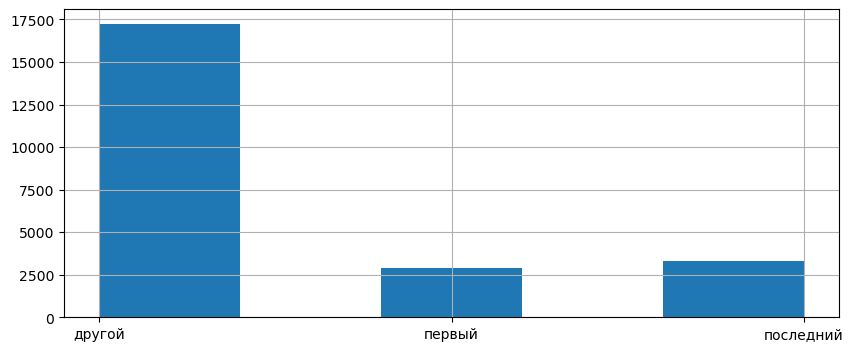

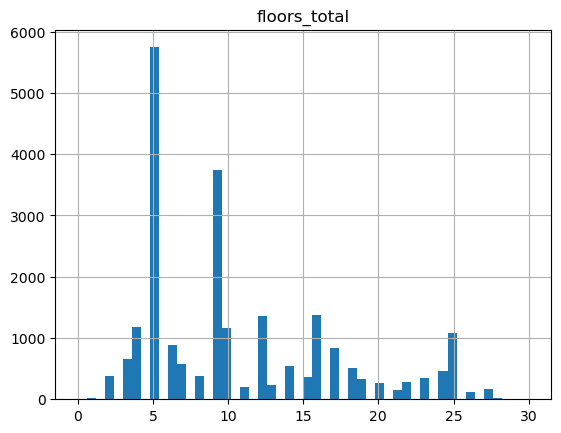

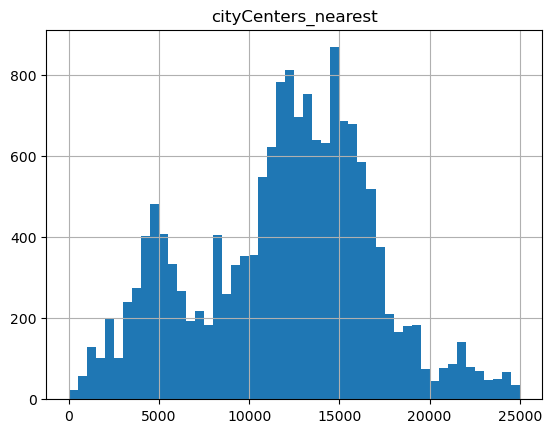

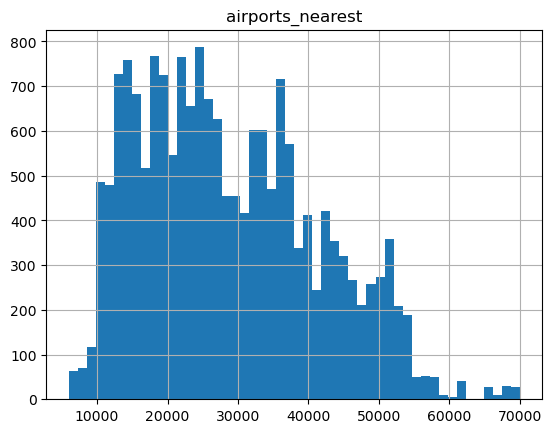

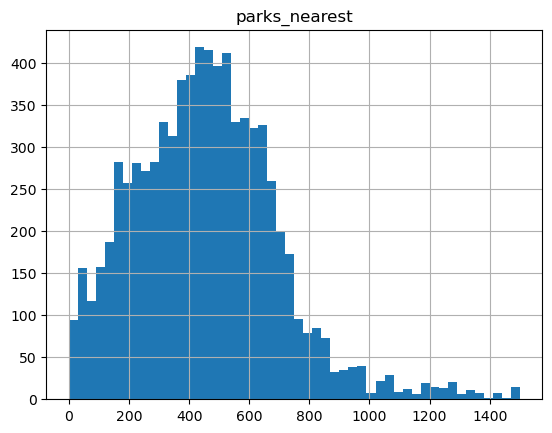

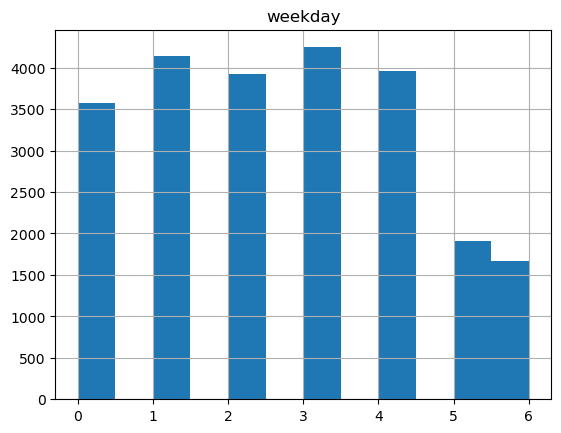

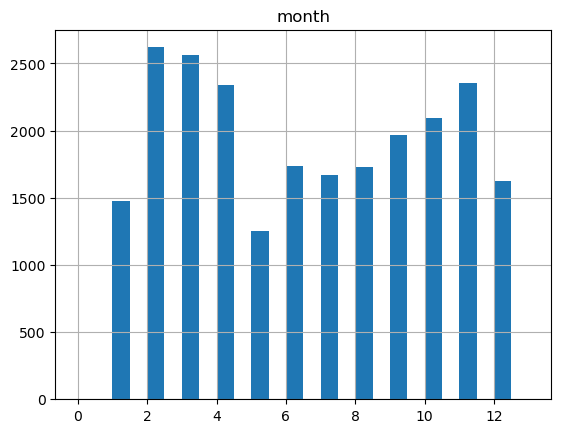

In [35]:
data['floor_type'].hist(bins=5, grid=True, figsize=(10,4))
data.hist('floors_total', bins = 50, range = (0, 30))
data.hist('cityCenters_nearest', bins = 50, range = (0, 25000))
data.hist('airports_nearest', bins = 50, range = (6000, 70000))
data.hist('parks_nearest', bins = 50, range = (0, 1500))
data.hist('weekday', bins = 12, range = (0, 6))
data.hist('month', bins = 26, range = (0, 13))

* `floor_type`:
По гистаграмме видно, что много вариантов квартир и на крайних, и на средних этажах.

* `floors_total`:
Гистраграмма подтверждает, что высотность типовых домов составляет 5, 9, 16 этажей. Высотных домов (этажность 17 и более) существенно меньше.

* `cityCenters_nearest`: 
Большинство продающихся квартир сосредоточено в черте города, на расстоянии 10-17 км от центра.

* `airports_nearest`:
Подавляющее большинство продающихся квартир находятся в 10-50 км от аэропорта.

* `parks_nearest`: 
В тех объявлениях, где заполнено расстояние до ближайшего парка, указано в основном 100-800 м. При этом в данном столбце не заполнено порядка 9000 ячеек. Можно предположить, что в основном их не заполняли, так как в ближайшем окружении парков нет.

* `weekday`: 
Чаще всего объявления публикуют на рабочей неделе.

* `month`: 
Чаще всего объявления публикуют в феврале-апреле. Провалы приходятся на праздничные периоды (май, декабрь-январь).

#### Скорость продажи квартиры

array([[<Axes: title={'center': 'days_exposition'}>]], dtype=object)

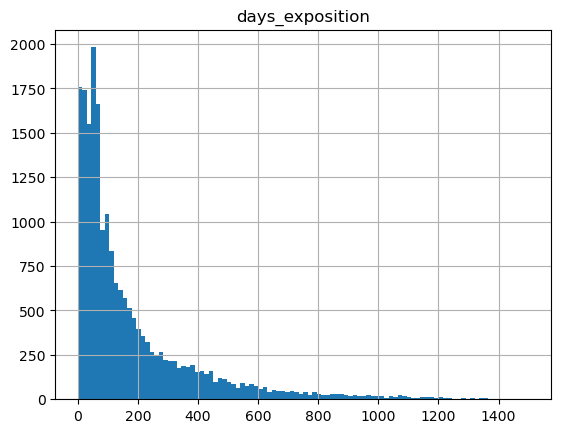

In [36]:
data.hist('days_exposition', bins = 100, range = (0, 1500))

count    20282.000000
mean       180.309092
std        219.245295
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

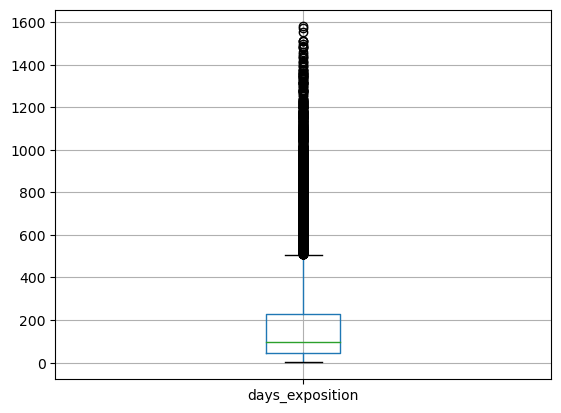

In [37]:
data.boxplot('days_exposition')
data['days_exposition'].describe()

Среднее значение числа дней продажи составляет около 180 дней, медианное - 95 дней. Среднее почти в два раза больше медианы. Это связано с тем, что на среднее большое влияние оказывают значения, сильно выделяющиеся из большинства, что и показывает распределение на гистаграмме с длинным хвостом с высокими значениями.

Таким образом, ориентируемся на медиану и считаем, что квартиры продаются в основном за 95 дней. Быстрыми можно назвать продажи за 45 дней, долгими - порядка 230 дней.

В построенной диаграмме размаха видно, что верхний "ус" упирается в 507 дней (=1,5 межквартального размаха + 3-й квартиль), что считается границей нормального размаха. Все, что выше 507 дней, относится к выбросам, то есть к необычно долгим продажам. 

#### Факторы, влияющие на общую стоимость объекта

<Axes: xlabel='rooms'>

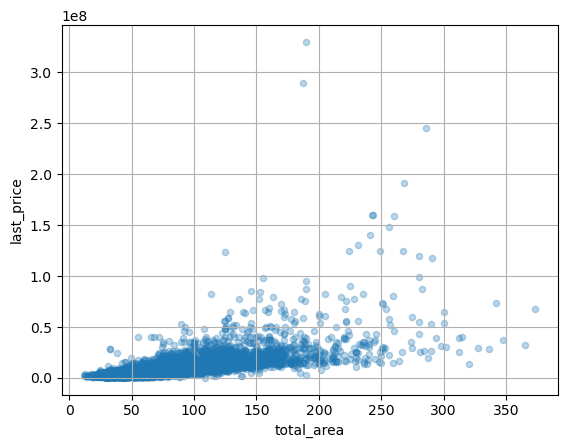

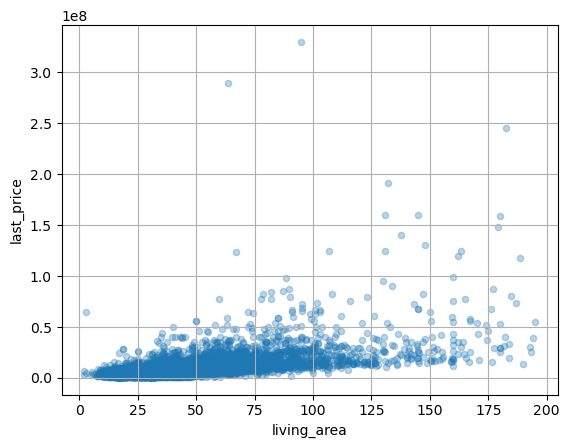

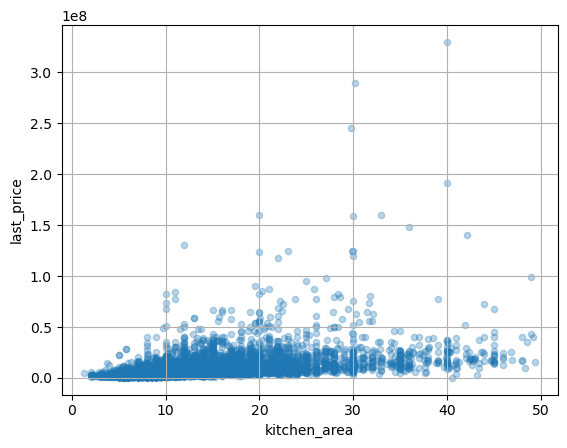

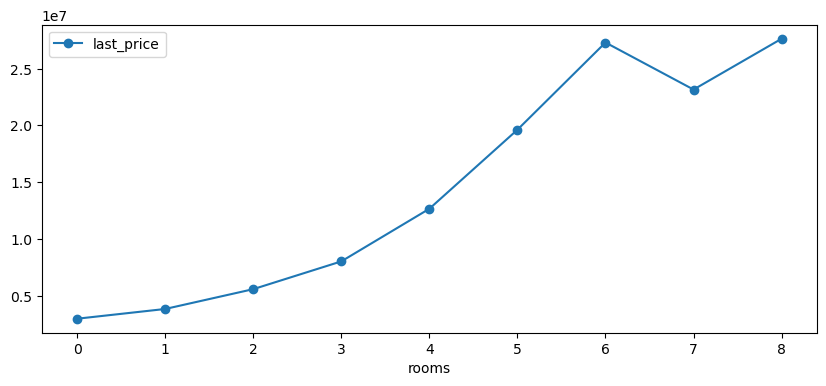

In [38]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3, grid=True)
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3, grid=True)
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3, grid=True)
data.pivot_table(index='rooms', values='last_price').plot(style='o-', figsize=(10,4))

In [39]:
print('Коэффициент Пирсона (стоимость/общая площадь):', data['total_area'].corr(data['last_price']))
print('Коэффициент Пирсона (стоимость/жилая площадь):', data['living_area'].corr(data['last_price']))
print('Коэффициент Пирсона (стоимость/площадь кухни):', data['kitchen_area'].corr(data['last_price']))
print('Коэффициент Пирсона (стоимость/количество комнат):', data['rooms'].corr(data['last_price']))

Коэффициент Пирсона (стоимость/общая площадь): 0.6756805410676395
Коэффициент Пирсона (стоимость/жилая площадь): 0.6014442741004606
Коэффициент Пирсона (стоимость/площадь кухни): 0.5089095952876161
Коэффициент Пирсона (стоимость/количество комнат): 0.39782123206739584


По графикам можно видеть, что с увеличением площади растет и цена. При этом цена зависит в большей степени от общей площади, а не от жилой, площади кухни и количестве комнат. О наличии довольно сильной связи цены с общей площадью говорит коэффициент Пирсона.

,square_meter_price
floor_type,
другой,98214.285714
первый,81223.628692
последний,87392.880686


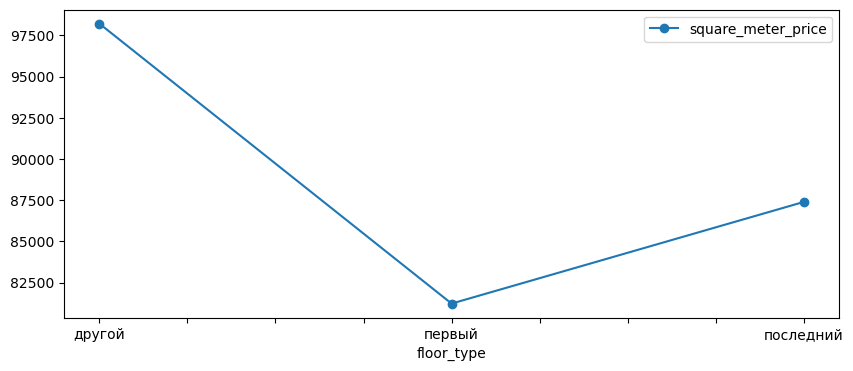

In [40]:
# построим график зависимости медианного значения цены за кв.метр для каждого типа этажа (первый, последний, другой)
data.pivot_table(index='floor_type', values='square_meter_price', aggfunc='median').plot(style='o-', figsize=(10,4))
data.pivot_table(index='floor_type', values='square_meter_price', aggfunc='median')

Данный график явно отображает, что стоимость квадратного метра в квартирах не крайних этажах существенно выше. Стоимость квадратного метра в квартирах на первом этаже самая низкая.

<Axes: xlabel='year'>

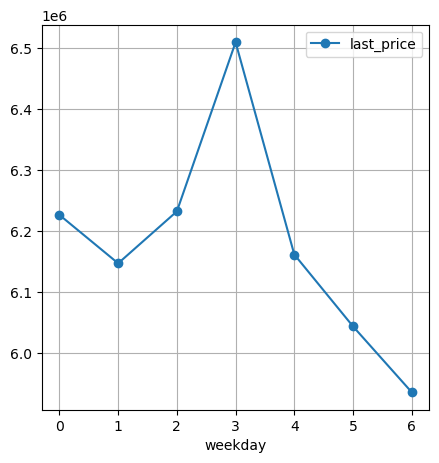

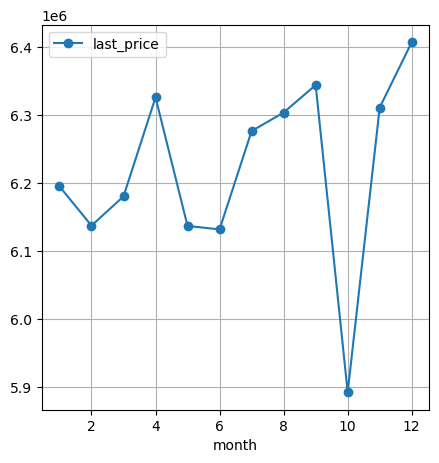

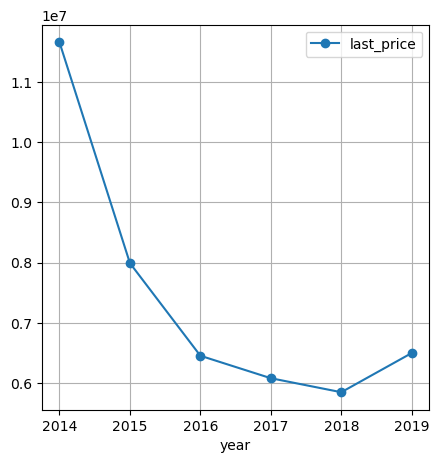

In [41]:
# Зависимость от даты размещения объявления (день недели, месяц, год)
data.pivot_table(index='weekday', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
data.pivot_table(index='month', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
data.pivot_table(index='year', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))

На графике зависимости цены от года можно отметить максимальные значения в 2014 году (что связано с ажиотажом на рынке в связи с политическими событиями) и затем падение цены до 2018 года. 

#### Средняя цена кв.метра в топ-10 населенных пунктах

In [42]:
cities_square_meter_price = data.pivot_table(index='locality_name', values='square_meter_price', aggfunc=['count', 'mean'])
cities_square_meter_price.columns = ['Количество объявлений', 'Средняя цена за 1 кв.м']
display(cities_square_meter_price.sort_values(by='Количество объявлений', ascending=False).head(10))

,Количество объявлений,Средняя цена за 1 кв.м
locality_name,,
Санкт-Петербург,15529,113864.763403
Мурино,551,85628.475547
Шушары,439,78551.344545
Всеволожск,397,68719.320400
Пушкин,364,102929.680628
Колпино,338,75424.579098
Парголово,327,90175.913458
Гатчина,307,68746.146763
Кудрово,299,92473.547576


Ожидаемо, подавляющее большинство объявлений - в Санкт-Петербурге. Там же и самая высокая цена за 1 кв.м (среди 10 населённых пунктов с наибольшим числом объявлений).

In [43]:
display(cities_square_meter_price.sort_values(by='Средняя цена за 1 кв.м', ascending=False).head(10))

,Количество объявлений,Средняя цена за 1 кв.м
locality_name,,
Зеленогорск,24,115122.799198
Санкт-Петербург,15529,113864.763403
Репино,4,104238.614786
Пушкин,364,102929.680628
Сестрорецк,183,101757.616875
Лисий Нос,3,100660.814239
Кудрово,170,100166.294900
Мистолово,11,98549.976709
Левашово,1,96997.690531


А вот если отсортировать данные по средней стоимости за квадратный метр, оказывается, что самые дорогие квартиры в Зеленогорске. И это не удивительно, так как Зеленогорск известен как климатический курорт, расположенный на северном побережье Финского залива Балтийского моря (в том же районе и поселок Репино).

In [44]:
display(cities_square_meter_price.sort_values(by='Средняя цена за 1 кв.м', ascending=True).head(10))

,Количество объявлений,Средняя цена за 1 кв.м
locality_name,,
Старополье,3,11206.221198
Свирь,2,11481.481481
Вахнова Кара,1,11688.311688
Выскатка,2,12335.480902
Совхозный,2,12629.129129
Малая Романовка,1,12724.550898
Тёсово-4,1,12931.034483
Сижно,1,13709.677419
Ям-Тесово,2,13711.553373


Самые низкие цены за 1 кв.м. в деревне Старополье, поселке станции Свирь, деревне Вахнова Кара и др. Эти цены на порядок ниже максимальных. Данные населенные пункты расположены на окраинах Ленинградской области.

#### Зависимость цены квартиры от расстояния до центра города

<Axes: xlabel='cityCenters_nearest_km'>

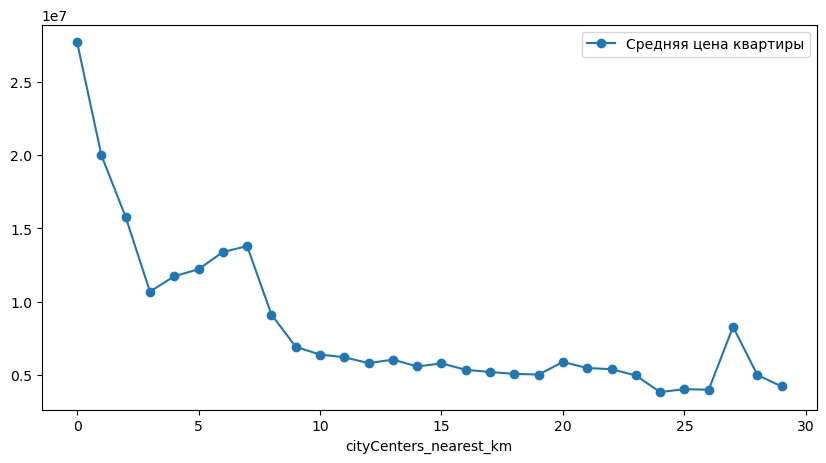

In [45]:
data_spb = data[data['locality_name']=='Санкт-Петербург']\
.pivot_table(index='cityCenters_nearest_km', values=['last_price'], aggfunc=['mean'])
data_spb.columns = ['Средняя цена квартиры']

data_spb.plot(style='o-', figsize=(10,5))

По графику видно снижение цены за 1 кв.м при удалении от центра Санкт-Петербурга. Можно отметить очень высокую цену квартир, которые находятся непосредственно в центре. Общая тенденция на понижение цены просматривается с пиками. По пикам можно предположить застройку новых современных и комфортных районов на расстоянии 6-7 км и 26-28 км от центра. 

### Общий вывод

Изучены особенности и зависимости, которые существуют на рынке недвижимости в Санкт-Петербурге и соседних населённых пунктах. Предварительно была выполнена предобработка данных.

**Устранены проблемы в данных:**
- Пропущенные значения.
- Аномалии в данных.
- Редкие значения.
- Не соответствующие типы данных.
- Неявные дубликаты.

**Добавлены столбцы в датасет:**
* `square_meter_price` — цена одного квадратного метра;
* `weekday` — день недели публикации объявления;
* `month` — месяц публикации объявления;
* `year` — год публикации объявления;
* `floor_type` — тип этажа квартиры;
* `cityCenters_nearest_km` — расстояние до центра города в километрах.

**Параметры объектов:**
* Большинство квартир, выставленных на продажу имеют 1-2 комнаты. Медианное значение общей площади составляет 52 кв.м. 

* Встречаются квартиры с очень большой общей площадью (от 112 кв.м) и по очень высоким ценам (от 11,65 млн.руб). 

* Медианное значение стоимости квартир - 4,6 млн. руб. Дорогими можно назвать квартиры стоимостью 6,7 млн.руб, относительно недорогими - 3,4 млн.руб.

* По гистаграммам распределения площадей и стоимости отчетливо прослеживается длинный хвост с высокими значениями. Т.е. существует сегмент элитного жилья, параметры которого сильно выбиваются из большинства. Возможно, имеет смысл анализировать ценовые сегменты по-отдельности. Так, для более точного анализа среднего ценового сегмента стоит отбросить все, что находится выше границы нормального размаха.


**Скорость продажи квартиры:**
- Квартиры продаются в основном за 95 дней. 
- Быстрыми можно назвать продажи за 45 дней, долгими - порядка 230 дней.
- Необычно долгие продажи - свыше 507 дней.

**Факторы, влияющие на общую стоимость объекта:**
- Цена квартиры существенно зависит от ее площади, что подтверждает высокий коэффициент корреляции (0.67). В большей степени цена зависит от общей площади, чем от планировки.
- Стоимость квартир на средних этажах выше, чем на первом и последнем этажах.
- Самые дешевые квартиры - на первом этаже (стоимость кв.м на 17% ниже, чем в квартирах на средних эатажах).
- Максимальный ажиотаж на рынке недвижимости приходится на февраль-апрель.

**Средняя цена кв.метра в топ-10 населенных пунктах:**
- В Санкт-Петербурге больше всего объявлений о продаже квартир.
- Самая высокая цена за 1 кв.м - 113872 р. (Санкт-Петербург).
- Отдельно можно выделить курортный район на северном побережье Финского залива Балтийского моря, где стоимость кв.м самая высокая по всей Ленинградской области.

**Зависимость цены квартиры от расстояния до центра города:**
- Квартиры непосредственно в центре Санкт-Петербурга очень дорогие.
- Цена за 1 кв.м снижается при удалении от центра Санкт-Петербурга, но при этом встречаются небольшие пики на расстоянии 6-7 км и 26-28 км от центра.
- Для более точной оценки стоимости квартиры хорошо было бы знать уровень транспортной доступности. Так, для анализа стоимости от расположения более интересен параметр "расстояние до метро", чем "расстояние до аэропорта".